# ProcessOptimize examples with categorical values

Sigurd carlsen 20 feb 2019

This notebook serves to showcase the new features that are being added to the scikit-optimize fork: ProcessOptimizer

In [1]:
import sys
"""Test skopt plotting with categorical dimensions."""
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from ProcessOptimizer import Integer, Categorical
from ProcessOptimizer import plots, gp_minimize
from ProcessOptimizer.plots import plot_objective

In [2]:
# For reproducibility
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

<Figure size 432x288 with 0 Axes>

In [3]:
SPACE = [
    Integer(1, 20, name='max_depth'),
    Integer(2, 100, name='min_samples_split'),
    Integer(5, 30, name='min_samples_leaf'),
    Integer(1, 30, name='max_features'),
    Categorical(list('abc'), name='dummy'),
    Categorical(['gini', 'entropy'], name='criterion'),
    Categorical(list('def'), name='dummy'),
]

In [4]:
def objective(params):
    clf = DecisionTreeClassifier(**{dim.name: val for dim, val in zip(SPACE, params) if dim.name != 'dummy'})
    return -np.mean(cross_val_score(clf, *load_breast_cancer(True)))

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))
result = gp_minimize(objective, SPACE, n_calls=20)

# plot_objective

Plot objective now supports optional use of partial dependence as well as different methods of defining parameter values for dependency plots

Here we see an example of using partial dependence. Even when setting n_points all the way down to 10 from the default of 40, this method is still very slow. This is because partial dependence calculates 250 extra predictions for each point on the plots.

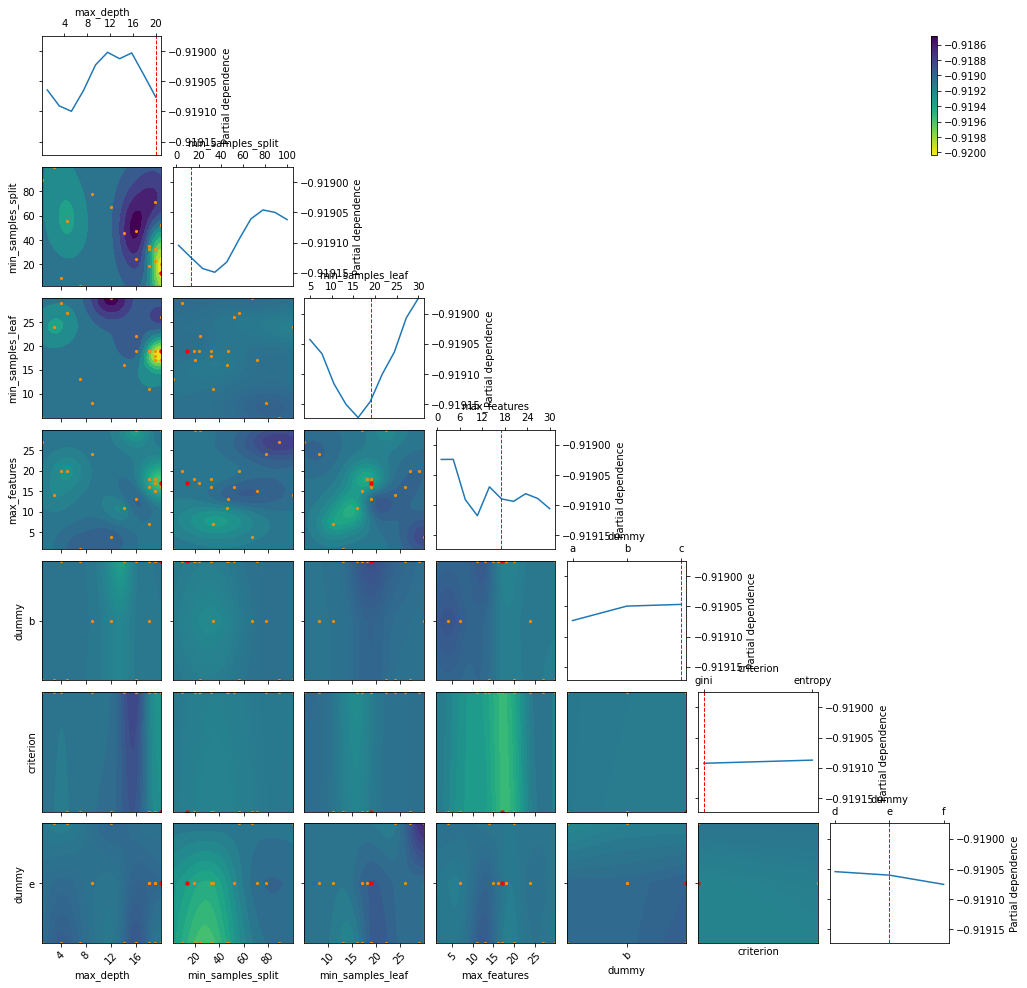

In [6]:
_ = plot_objective(result,usepartialdependence = True, n_points = 10)

Here we plot without partial dependence. We see that it is a lot faster. Also the values for the other parameters are set to the default "result" which is the parameter set of the best observed value so far. In the case of funny_func this is close to 0 for all parameters.

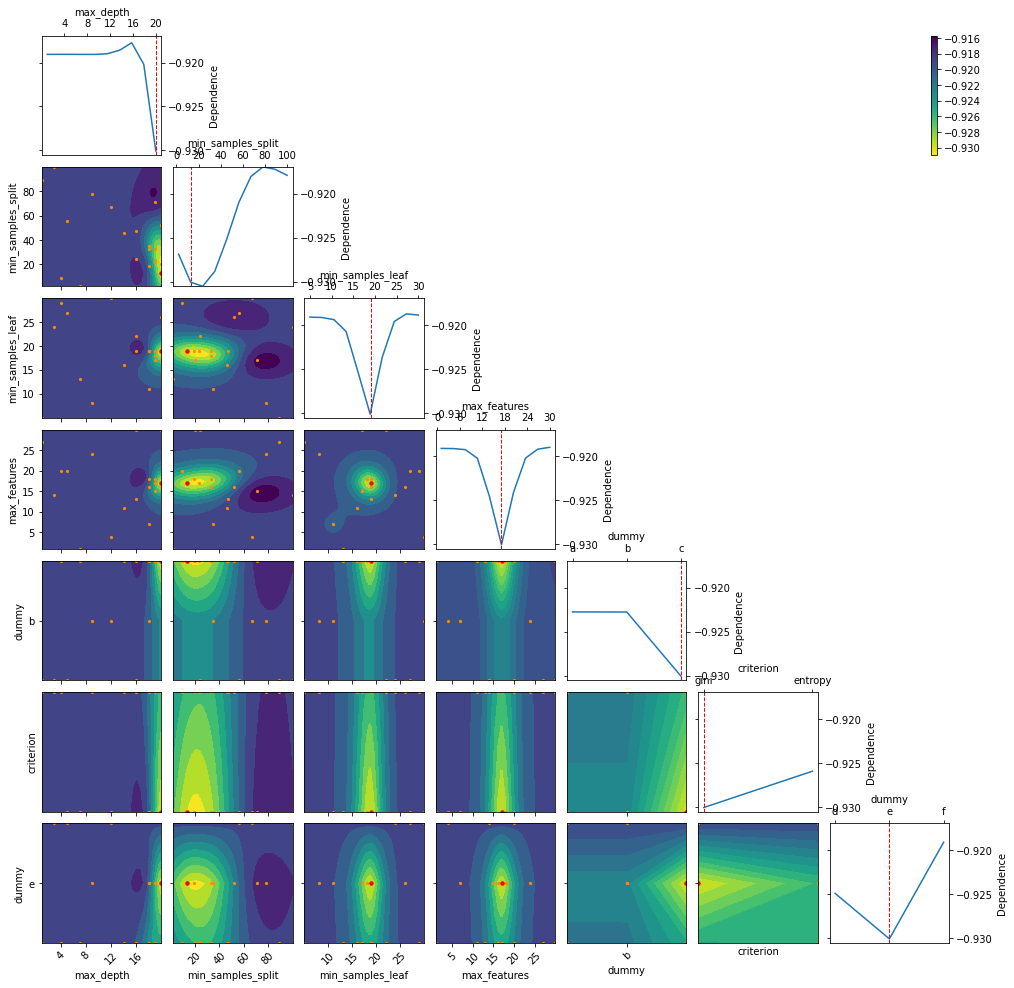

In [7]:
_ = plot_objective(result,usepartialdependence = False, n_points = 10)

Here we try with setting the other parameters to something other than "result". When dealing with categorical dimensions we can't use 'expected_minimum'. Therefore we try with "expected_minimum_random" which is a naive way of finding the minimum of the surogate by only using random sampling:

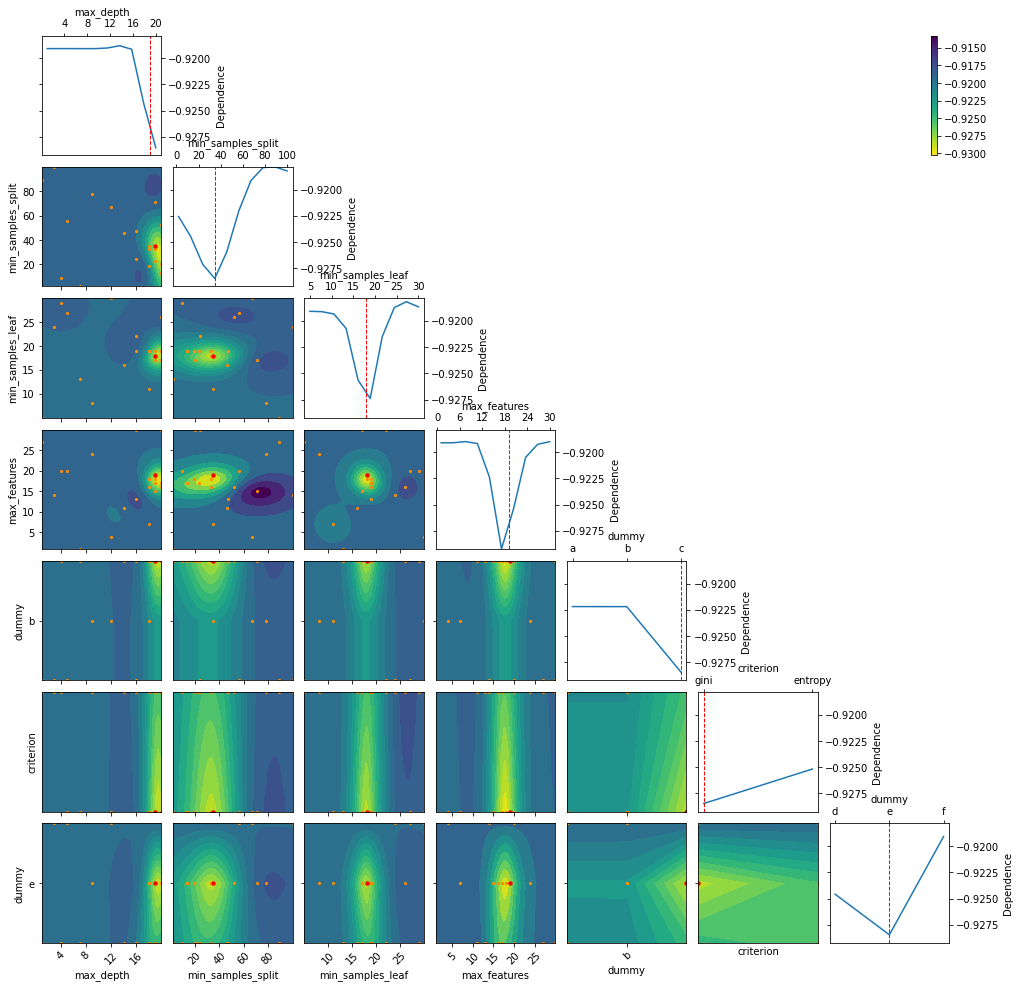

In [8]:
_ = plot_objective(result,usepartialdependence = False, n_points = 10,pars = 'expected_minimum_random')

Lastly we can also define these parameters ourselfs by parsing a list as the pars argument:

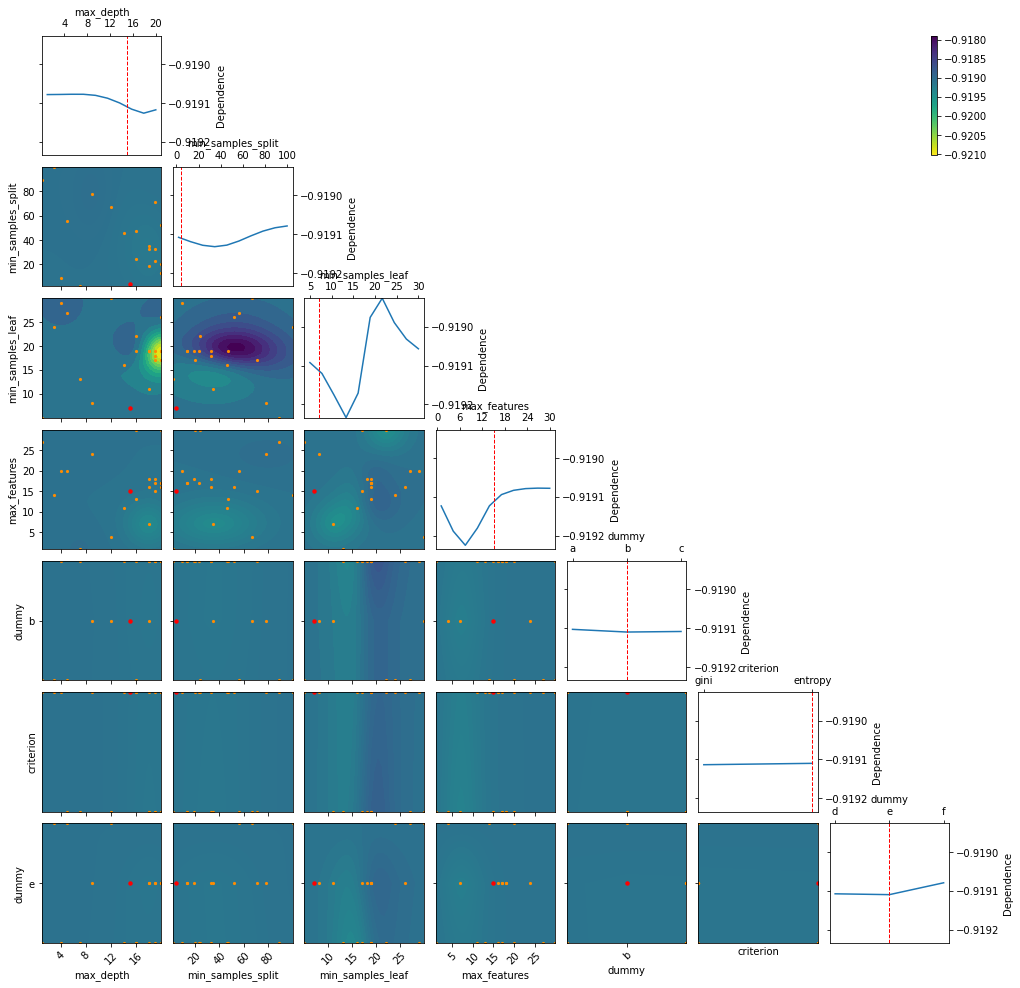

In [9]:
_ = plot_objective(result,usepartialdependence = False, n_points = 10,pars = [15, 4, 7, 15, 'b', 'entropy', 'e'])

We can also specify how many intial samples are used for the "expected_minimum_random" method. We set it to a low value in the next examples to showcase how it affects the minimum for the two methods.

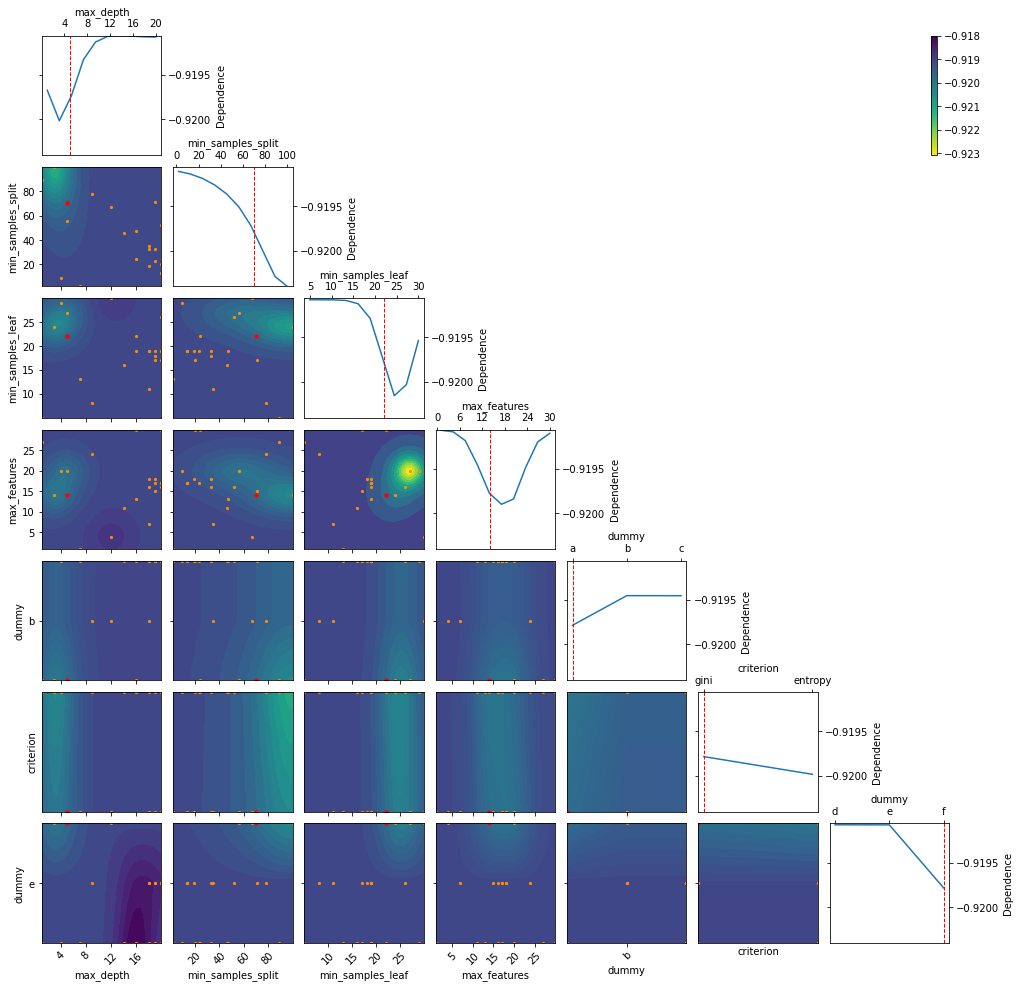

In [10]:
_ = plot_objective(result,usepartialdependence = False, n_points = 10,pars = 'expected_minimum_random',expected_minimum_samples = 10)